In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from matplotlib.image import imread


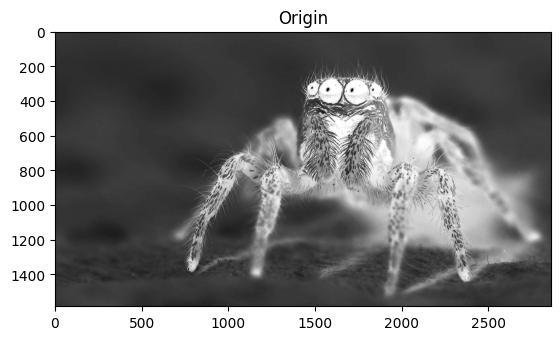

In [2]:
os.chdir(r'D:\NguyenBao')
A = imread('spider.jpg')
A = np.mean(A, -1)

img = plt.imshow(256 - A).set_cmap('gray')
plt.title('Origin')
plt.show()


In [15]:
A = np.random.randint(100, size = (50, 80))
A = [[3,2,2],[2,3,-2]]
A = np.array(A)
A


array([[ 3,  2,  2],
       [ 2,  3, -2]])

In [26]:
m, n= A.shape

eigenvalues, V = np.linalg.eig(A.T @ A)
eigenvalues = np.round(eigenvalues, decimals = 4)
V = np.round(V, decimals = 4)
idx = eigenvalues.argsort()[::-1]

eigenvalues = (eigenvalues[idx])
V = V[:,idx]
VT = V.T
singularvalues = np.sqrt(eigenvalues)


U = (A @ V)[:, 0:m] / singularvalues[0:m]
print("U = \n", U)
U = U[:, :m]

print("sing values: \n", singularvalues)
print("eigen vectors: \n", V.T)
S = np.diag(singularvalues)[0:m, :]

X = U @ S @ VT
print("\n\n --> Reconstruct matrix A: \n", X)

U = 
 [[-0.7071  0.7071]
 [-0.7071 -0.7071]]
sing values: 
 [5. 3. 0.]
eigen vectors: 
 [[-0.7071 -0.7071 -0.    ]
 [ 0.2357 -0.2357  0.9428]
 [-0.6667  0.6667  0.3333]]


 --> Reconstruct matrix A: 
 [[ 2.99994246  1.99996164  1.99996164]
 [ 1.99996164  2.99994246 -1.99996164]]


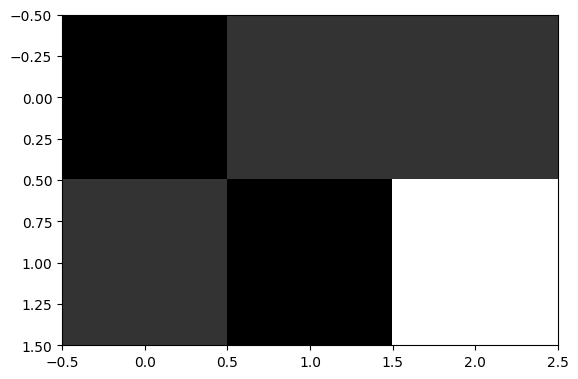

In [5]:
X = np.real(X)
img = plt.imshow(256-X).set_cmap('gray')

In [6]:
#using numpy
U, S, VT = np.linalg.svd(A, full_matrices=False)
S = np.diag(S)


In [7]:
decimals = 5
print("\n", np.round(U, decimals=decimals))
print("\n", np.round(S, decimals=decimals))
print("\n", np.round(VT, decimals=decimals))


 [[-0.70711 -0.70711]
 [-0.70711  0.70711]]

 [[5. 0.]
 [0. 3.]]

 [[-0.70711 -0.70711 -0.     ]
 [-0.2357   0.2357  -0.94281]]


In [8]:
print("\n", U.shape)
print("\n", S.shape)
print("\n", VT.shape)


 (2, 2)

 (2, 2)

 (2, 3)


In [9]:

X = U @ S @VT
X = np.real(X)
print(np.round(X, decimals = 2))

[[ 3.  2.  2.]
 [ 2.  3. -2.]]


U shape:  (2, 2)
S shape:  (2, 2)
VT shape:  (2, 3)


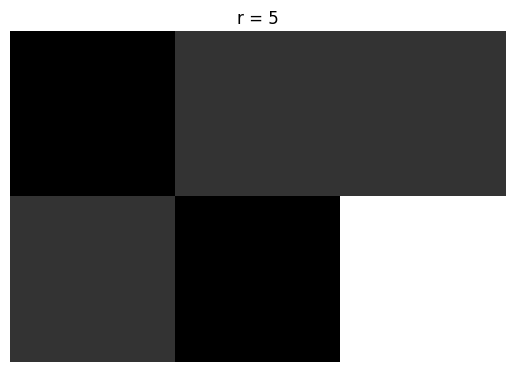

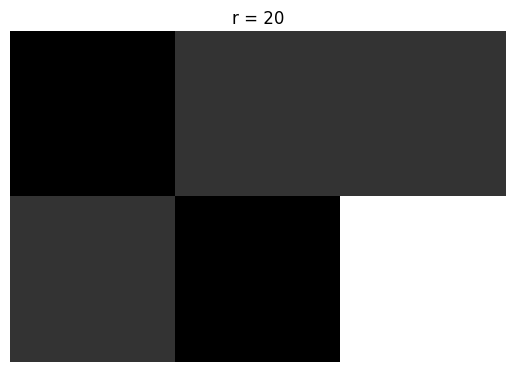

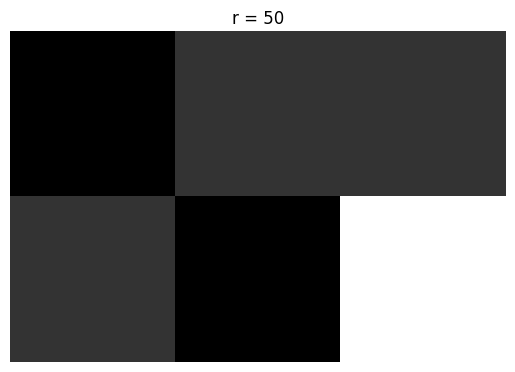

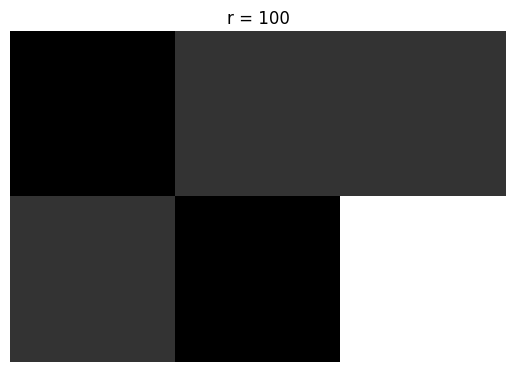

In [10]:
j = 0
print("U shape: ", U.shape)
print("S shape: ", S.shape)
print("VT shape: ", VT.shape)
# Xapp = U @ S @VT
# Xapp = np.real(Xapp)
# print(Xapp.shape)
# img = plt.imshow(256 - Xapp)
# img.set_cmap('gray')
# plt.axis('off')
# plt.title('r = ' + str(r))
# plt.show()

for r in (5, 20, 50, 100):
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    # Xapprox = U[:, :r] @ np.diag(S[:r]) @ VT[:r, :]

    plt.figure(j+1)
    j += 1
    img = plt.imshow(256 - Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

In [11]:
import numpy as np

def calcMatrix(matrix, op):
    if op == 1:  # case of U
        newM = matrix @ matrix.T
    else:  # case of V
        newM = matrix.T @ matrix

    eigenvalues, eigenvectors = np.linalg.eig(newM)
    index = eigenvalues.argsort()[::-1]

    if op == 1:  # case of U
        return eigenvectors[:, index]
    else:  # case of V
        return eigenvectors[:, index].T


def calcSigma(matrix):
    MMT = matrix @ matrix.T
    MTM = matrix.T @ matrix

    if MMT.size < MTM.size:
        newM = MMT
    else:
        newM = MTM

    eigenvalues, _ = np.linalg.eig(newM)
    singular_values = np.sqrt(np.sort(eigenvalues)[::-1])

    return singular_values


def mySVD(matrix):
    U = calcMatrix(matrix, 1)
    VT = calcMatrix(matrix, 0)
    S = calcSigma(matrix)

    m, n = matrix.shape
    k = min(m, n)

    S_diag = np.zeros((m, n))
    S_diag[:k, :k] = np.diag(S)

    return U[:, :k], S_diag[:k, :k], VT[:k, :]


# Test with a matrix A
A = np.random.randint(10, size=(5, 8))
A = np.array(A)
print(A)
U, S, VT = mySVD(A)

X = U @ S @ VT
print(np.round(X, decimals=2))


[[5 9 3 1 1 6 0 4]
 [6 3 1 7 1 3 5 9]
 [0 0 4 7 4 0 6 9]
 [2 8 0 7 5 9 7 4]
 [1 9 6 3 1 7 1 2]]
[[-5.05+0.j -8.55+0.j -3.43+0.j -2.44+0.j  0.86+0.j -6.46+0.j -0.18+0.j
  -3.19+0.j]
 [-5.96+0.j -3.34+0.j -0.67+0.j -5.91+0.j -2.41+0.j -2.65+0.j -4.87+0.j
  -9.61+0.j]
 [-0.03+0.j  0.25+0.j -4.23+0.j -7.78+0.j -2.99+0.j -0.25+0.j -6.1 +0.j
  -8.56+0.j]
 [-2.01+0.j -7.93+0.j -0.07+0.j -7.24+0.j -4.7 +0.j -9.08+0.j -7.03+0.j
  -3.87+0.j]
 [-0.96+0.j -9.37+0.j -5.65+0.j -1.81+0.j -2.54+0.j -6.62+0.j -0.85+0.j
  -2.67+0.j]]
